https://tinyurl.com/yvyxecu8

This tutorial was created by Hamayoon Behmanush (https://www.linkedin.com/in/hamayoon-behmanush-36401996/), a research assistant in Ingmar's group. The tutorial is based on https://worldbank.github.io/connectivity_mapping/linkedin_nbs/interface.html which was built for LinkedIn advertising data. However, the approach to collecting LinkedIn and TikTok advertising data is very similar.

# TikTok Advertising Data - What TikTok Tell us About the Society

TikTok advertising data can be utilized for a variety of things, including informing marketing plans, gauging the success of campaigns, and learning more about audience behavior. We can easily target users in a certain place with a specified age group, gender, and interest using TikTok Ads Manager. For instance, you can display your adverts for girls between the ages of 25 and 34 who are interested in Luxury Hotels in Berlin. We will attempt to identify user numbers in various German states in this notebook while taking into account their gender, age, and hobbies.

# Installing and Importing the Required Libraries

**requests:** A Python library that simplifies making HTTP requests and interacting with web APIs.

**json:** A library that enables encoding and decoding JSON data in Python.

**pandas:** A powerful data manipulation library in Python for working with structured data, providing easy-to-use data structures and data analysis tools.

**matplotlib.pyplot: **A plotting library in Python that allows for the creation of various types of visualizations, such as line plots, scatter plots, and histograms.

**time:** A library that provides various time-related functions and utilities in Python, allowing for operations like measuring time intervals and adding delays.

**seaborn:** A Python data visualization library built on top of matplotlib, providing a high-level interface for creating attractive and informative statistical graphics.

In [ ]:
# !pip install requests
# !pip install pandas
# !pip install matplotlib.pyplot
# !pip install seaborn


import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

# Defining Cookies, Headers and Json

Cookies, headers and json that contain various key-value pairs. The cookies  stores multiple cookie values that can be sent with HTTP requests, while the headers includes instructions to the server how to handle the request. Json define the payload which we need to access.

In [ ]:
cookies = {

    'tta_attr_id': '0.123.123',

    'tta_attr_id_mirror': '0.123.7123',

    'part': 'stable',

    'passport_csrf_token': 'xxxx',

    'passport_csrf_token_default': 'xxx',

    'pre_country': 'DE',

    'csrftoken': 'xxx',

    's_v_web_id': 'verify_xxx',

    'd_ticket_ads': 'xxx',

    'sso_auth_status_ads': 'xxx',

    'sso_auth_status_ss_ads': 'xxx',

    'sso_uid_tt_ads': 'xxx',

    'sso_uid_tt_ss_ads': 'xxx',

    'sso_user_ads': 'xxx',

    'sso_user_ss_ads': 'xxx',

    'toutiao_sso_user_ads': 'xxx',

    'toutiao_sso_user_ss_ads': 'xxx',

    'sid_ucp_sso_v1_ads': '1.0.0-xxx',

    'ssid_ucp_sso_v1_ads': '1.0.0-xxx',

    'ac_csrftoken': 'xxx',

    'cookie-consent': '{%22ga%22:true%2C%22af%22:true%2C%22fbp%22:true%2C%22lip%22:true%2C%22bing%22:true%2C%22ttads%22:true%2C%22reddit%22:true%2C%22criteo%22:true%2C%22version%22:%22v9%22}',

    'store-idc': 'useast2a',

    'store-country-code': 'de',

    'store-country-code-src': 'uid',

    'from_way': 'paid',

    '_gcl_au': '1.1.123.123',

    '_gid': 'GA1.2.123.123',

    '_gat_UA-143770054-3': '1',

    '_rdt_uuid': '123',

    '_fbp': 'fb.1.123',

    '_tt_enable_cookie': '1',

    '_ttp': '2Qy3GL5nDQ3SsLxDQhq5S6QA86g',

    '_gcl_aw': 'xxx',

    '_gac_UA-143770054-3': 'xxx',

    '_uetsid': 'xxx',

    '_uetvid': 'xxx',

    '_hjSessionUser_2525957': 'xxx',

    'cto_bundle': 'xxx',

    'passport_auth_status_ads': '123',

    'passport_auth_status_ss_ads': '123',

    'sid_guard_ads': '123',

    'uid_tt_ads': '123',

    'uid_tt_ss_ads': '123',

    'sid_tt_ads': '123',

    'sessionid_ads': '123',

    'sessionid_ss_ads': '123',

    'sid_ucp_v1_ads': '1.0.0-xxx',

    'ssid_ucp_v1_ads': '1.0.0-xxx',

    '_ga_R5EYE54KWQ': 'GS1.1.123.2.0.123.54.0.0',

    'lang_type': 'en',

    '_ga': 'GA1.1.123',

    'msToken': 'xxx',

    '_ga_HV1FL86553': 'GS1.1.1686316826.3.0.1686316833.53.0.0',

    'odin_tt': 'xxx',

    'api_csrftoken': 'xxx',

    'msToken': 'xxx',

    'ttwid': 'xxx',

}

headers = {

    'authority': 'ads.tiktok.com',

    'accept': 'application/json, text/plain, */*',

    'accept-language': 'en-US,en;q=0.9',

    'content-type': 'application/json',

    'cookie': 'tta_attr_id=0.123; tta_attr_id_mirror=0.123; part=stable; passport_csrf_token=xxx; passport_csrf_token_default=xxx; ....... ',

    'origin': 'https://ads.tiktok.com',

    'referer': 'https://ads.tiktok.com/i18n/fast_creation/ads-creation/audience-placement?aadvid=123&attr_adgroup_id=123&......&lang=en&no_parent_redirect=1',

    'sec-ch-ua': '"Not.A/Brand";v="8", "Chromium";v="114", "Google Chrome";v="114"',

    'sec-ch-ua-mobile': '?0',

    'sec-ch-ua-platform': '"Windows"',

    'sec-fetch-dest': 'empty',

    'sec-fetch-mode': 'cors',

    'sec-fetch-site': 'same-origin',

    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36',

    'x-csrftoken': 'xxx',

}

Json_Data = {
   "objective_type": 9,
   "inventory_flow": [
      "3000"
   ],
   "audience": {
      "ad_tag_v2": [],
      "video_actions_v2": [],
      "action_categories_v2": [],
      "action_days_v2": [],
      "action_scenes_v2": [],
      "platform": [
         "0"
      ],
      "retargeting_tags": [],
      "retargeting_tags_exclude": [],
      "particle_locations": [
         "3017382"
      ],
      "gender": "0",
      "ac": [],
      "age": [],
      "language_list": [],
      "android_osv": "",
      "ios_osv": "",
      "carriers": [],
      "launch_price": [],
      "flow_package_include": [],
      "flow_package_exclude": [],
      "app_retargeting_install": False,
      "app_retargeting_type": None,
      "retargeting_audience_rule": None,
      "automated_targeting": 0
   },
   "ad_ref_app_id": "",
   "ad_ref_pixel_id": "",
   "external_type": 602,
   "optimize_goal": 108,
   "op_sys_filter": 0
}


# Distribution of TikTok Users in Germany States - Based on Gender

Here we will sends a POST request to the TikTok API with specified cookies, headers, JSON data, LocID, and GenID. The function modifies the JSON data by updating the 'particle_locations' and 'gender' fields before sending the request. The result of the request is stored in response, and the content of the response is decoded and returned as a string.

In [ ]:
def request_tiktok(cookies, headers, Json_Data, LocID, GenID):
  Json_Data['audience']['particle_locations'] = LocID
  Json_Data['audience']['gender'] = GenID
  response = requests.post(

    'https://ads.tiktok.com/api/v3/i18n/optimizer/audience/user/estimate/?aadvid=123&req_src=am_lite&msToken=xxx&X-Bogus=xxx&_signature=xxx',

    cookies=cookies,

    headers=headers,

    json=Json_Data ,)
  Respose_String = response.content.decode('utf-8')
  return Respose_String

In [ ]:
def get_upper_lower(Respose_String):
    output_result = json.loads(Respose_String)
    lower = output_result['data']['upper_user_count']
    uper = output_result['data']['lower_user_count']
    return uper, lower

In [ ]:
gender = {'Male': '1', 'Female': '2'}
locations = {'Saarland': ['2842635'],
             'Berlin': ['2950157'],
             'Bavaria': ['2951839']
             }

In [ ]:
# Create an empty DataFrame
result_df = pd.DataFrame(columns=['Location', 'Gender', 'Upper Value', 'Lower Value'])

# Iterate over locations
for location_key, location_value in locations.items():
    # Iterate over gender
    for gender_key, gender_value in gender.items():
        # Make the request with location and gender values
        response = request_tiktok(cookies, headers, Json_Data, location_value, gender_value)

        # Extract the upper and lower values from the response
        uper, lower = get_upper_lower(response)
        # Append the result to the DataFrame
        df_temp = pd.DataFrame({'Location': location_key, 'Gender': gender_key, 'Upper Value': uper, 'Lower Value': lower}, index=[0])
        result_df = pd.concat([result_df, df_temp], ignore_index=True)

        time.sleep(10)

        # # Store the upper and lower values in the result dictionary
        # result_dict = {"location": location_key, "gender": gender_key, "upper": uper, "lower": lower}

In [ ]:
print(result_df)

   Location  Gender Upper Value Lower Value
0  Saarland    Male       80000       99000
1  Saarland  Female       86000      107000
2    Berlin    Male      642000      786000
3    Berlin  Female      657000      804000
4   Bavaria    Male     1091000     1335000
5   Bavaria  Female     1128000     1379000


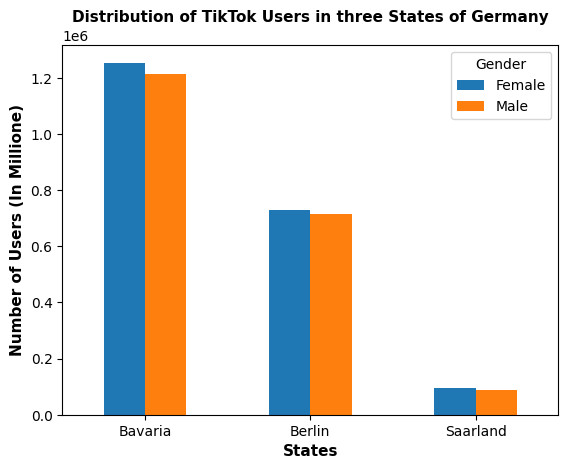

In [ ]:
result_df['Users_Mean'] = result_df[['Upper Value', 'Lower Value']].mean(axis = 1)


# Pivot the data to have separate columns for Male and Female users
pivot_df = result_df.pivot(index='Location', columns='Gender', values='Users_Mean')

# Plot the bar plot
ax = pivot_df.plot(kind='bar', rot=0) #rot - Rotation
ax.set_ylabel('Number of Users (In Millione)', fontweight='bold', fontsize=11)
ax.set_xlabel("States", fontweight='bold', fontsize=11)
ax.set_title('Distribution of TikTok Users in three States of Germany', fontweight='bold', fontsize=11)


plt.show()

In [ ]:
##########################Your Turn - Give a Try to See the Distribution of Users Based on Gender on Three Other States of Germany##########################
# Germany: 2921044

# Baden-Württemberg: 2953481

# Bavaria: 2951839

# Berlin: 2950157

# Brandenburg: 2945356

# Bremen: 2944387

# Hamburg: 2911297

# Hesse: 2905330

# Lower Saxony: 2862926

# Mecklenburg-Vorpommern: 2872567

# North Rhine-Westphalia: 2861876

# Rhineland-Palatinate: 2847618

# Saarland: 2842635

# Saxony: 2842566

# Saxony-Anhalt: 2944387

# Schleswig-Holstein: 2838632

# Thuringia: 2822542

# Who interests in what in Saarland - Two Wheel Vehicales

In this following, we will send a request to ads.tiktok.com to determine the number of users interested in Two-Wheel Vehicles in Saarland.

In [ ]:
def request_tiktok_Two_WheeledVehicles(cookies, headers, Json_Data, GenID, InterestID):
  Json_Data['audience']['particle_locations'] = ['2842635']
  Json_Data['audience']['gender'] = GenID
  Json_Data['audience']['ad_tag_v2'] = InterestID
  response = requests.post(

    'https://ads.tiktok.com/api/v3/i18n/optimizer/audience/user/estimate/?aadvid=123&req_src=am_lite&msToken=xxx&X-Bogus=xxx&_signature=_xxx',

    cookies=cookies,

    headers=headers,

    json=Json_Data ,)
  Respose_String_Two_WheeledVehicles = response.content.decode('utf-8')
  return Respose_String_Two_WheeledVehicles

In [ ]:
def getting_upper_user_count(data_string):
    data_dict = json.loads(data_string)
    upper_user_count = data_dict['data']['upper_user_count']
    return upper_user_count

In [ ]:
# Response_interstOnVehicals = request_tiktok_Two_WheeledVehicles(cookies, headers, Json_Data, '1', ['11108'])
# print(getting_upper_user_count(Response_interstOnVehicals))
TwoWheeledVehicaleIDs = {
    'Motorcycal': ['11106'],
    'Bicycle': ['11107'],
    'ElectronicEscooter': ['11108']
}

Gender_IDsVehicale = {
    'Male': '1',
    'Female': '2'
}

In [ ]:
# Create an empty DataFrame
result_Vehicals = pd.DataFrame(columns=['twoWheelsVehcale_Type', 'Gender', 'NumberOfUsers'])

for vehi_key, vehi_value in TwoWheeledVehicaleIDs.items():
  for gen_key, gen_value in Gender_IDsVehicale.items():
    res_veh = request_tiktok_Two_WheeledVehicles(cookies, headers, Json_Data, gen_value, vehi_value)
    Tik_users = getting_upper_user_count(res_veh)

    Temp_Data = pd.DataFrame({'twoWheelsVehcale_Type': vehi_key, 'Gender': gen_key, 'NumberOfUsers': Tik_users}, index=[0])

    result_Vehicals = pd.concat([result_Vehicals, Temp_Data], ignore_index=True)
    time.sleep(10)

In [ ]:
print(result_Vehicals)

  twoWheelsVehcale_Type  Gender NumberOfUsers
0            Motorcycal    Male         20000
1            Motorcycal  Female         14000
2               Bicycle    Male         44000
3               Bicycle  Female         37000
4    ElectronicEscooter    Male         33000
5    ElectronicEscooter  Female         28000


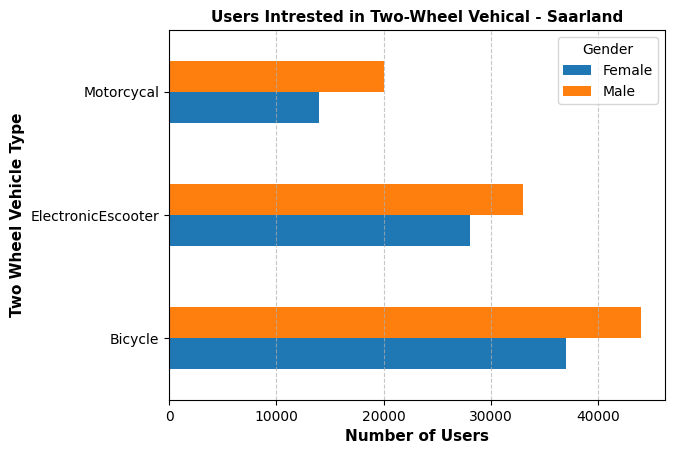

In [ ]:
# Pivot the dataframe to have Gender as columns
pivot_df = result_Vehicals.pivot(index='twoWheelsVehcale_Type', columns='Gender', values='NumberOfUsers')

# Plot the bar chart
pivot_df.plot(kind='barh')
plt.ylabel('Two Wheel Vehicle Type', fontweight='bold', fontsize=11)
plt.xlabel('Number of Users', fontweight='bold', fontsize=11)
plt.title('Users Intrested in Two-Wheel Vehical - Saarland', fontweight='bold', fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
##########################Your Turn - Give a Try to See who interests in what in terms of hotels (Luxury Hotels, Economy Hotels and Villas) in Berlin##########################
#

# Who interacts with which type of videos - Commenting on Beauty and Style

In this section, our objective is to analyze user interaction with videos, specifically focusing on the category of Beauty and Style in Germany. We aim to identify which videos have the highest level of interaction, particularly in terms of commenting.

In [ ]:
def request_tiktok_BeutyAndStyle(cookies, headers, Json_Data, GenID):
  Json_Data['audience']['particle_locations'] = ['2921044']
  Json_Data['audience']['gender'] = GenID
  Json_Data['audience']['video_actions_v2'] = [['2']]
  Json_Data['audience']['action_categories_v2'] = [['16']]
  Json_Data['audience']['action_days_v2'] = ['15']
  Json_Data['audience']['action_scenes_v2'] = ['2']
  response = requests.post(

    'https://ads.tiktok.com/api/v3/i18n/optimizer/audience/user/estimate/?aadvid=123&req_src=am_lite&msToken=xxx&X-Bogus=xxx&_signature=xxx',

    cookies=cookies,

    headers=headers,

    json=Json_Data ,)
  Respose_String_BeutyAndStyle = response.content.decode('utf-8')
  return Respose_String_BeutyAndStyle

In [ ]:
# Response_BeutyAndStyle = request_tiktok_BeutyAndStyle(cookies, headers, Json_Data)
# print(getting_upper_user_count(Response_BeutyAndStyle))
Gender_IDsBeuty = {
    'Male': '1',
    'Female': '2'
}

In [ ]:
result_Beuty = pd.DataFrame(columns=['Country', 'Gender', 'NumberOfUser'])
for genBeu_key, GenBeu_value in Gender_IDsBeuty.items():
  res_beuty = request_tiktok_BeutyAndStyle(cookies, headers, Json_Data, GenBeu_value)
  Tik_Beuty_Users = getting_upper_user_count(res_beuty)
  T_Beu_Data = pd.DataFrame({'Country': 'Germany', 'Gender': genBeu_key, "NumberOfUser": Tik_Beuty_Users}, index=[0])
  result_Beuty = pd.concat([result_Beuty, T_Beu_Data], ignore_index=True)
  time.sleep(10)

In [ ]:
print(result_Beuty)

   Country  Gender NumberOfUser
0  Germany    Male       593000
1  Germany  Female      1164000


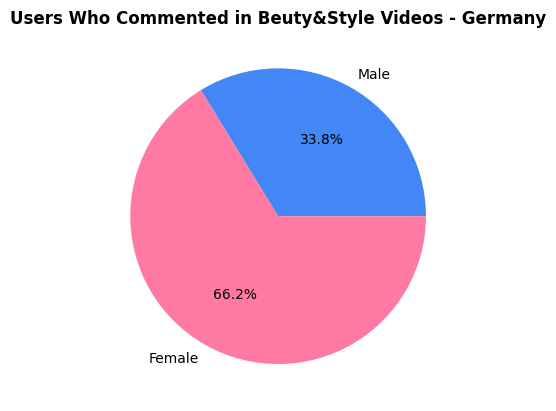

In [ ]:
# Plotting
fig, ax = plt.subplots()
colors = ['#4287f5', '#ff7aa2']
ax.pie(result_Beuty['NumberOfUser'], labels=result_Beuty['Gender'], autopct='%1.1f%%', colors=colors)

ax.set_title('Users Who Commented in Beauty&Style Videos - Germany', fontweight='bold')

plt.show()

In [ ]:
##########################Your Turn - Give a Try to See Who Watched more Videos about Beauty and Syle in Saarland##########################
#video_actions_v2":[[0]]

# Some links that may help you to learn more about TikTok advertising data



*   [TikTok Marketing API Documentation ](https://ads.tiktok.com/gateway/docs/index?identify_key=2b9b4278e47b275f36e7c39a4af4ba067d088e031d5f5fe45d381559ac89ba48&language=ENGLISH&doc_id=1707957200780290)
*   [Seeing ChatGPT Through Students' Eyes: An Analysis of TikTok Data](https://arxiv.org/abs/2303.05349)


*   [TikTok Analysis with Python](https://www.analyticsvidhya.com/blog/2023/03/tiktok-sentiment-analysis-with-python-analyzing-user-reviews/)



